<a href="https://colab.research.google.com/github/Hcardenass/Clasificador-de-Imagenes/blob/main/Clasificador_de_imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import tensorflow as tf #Libreria para inteligencia artificial echa por google
import tensorflow_datasets as tfds  #Importar libreria para descargar datasets

In [93]:
datos, metadatos = tfds.load('fashion_mnist',as_supervised=True,with_info=True)   #Descargamos el set de datos con sus megadatos, tensorflow datasets tiene muchos set de datos para imagenes audios traducciones etc.

In [94]:
metadatos  #Informacion del set descargado

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.1,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [95]:
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']  #Conjunto de datos en variables diferentes para utilizarlas

In [96]:
nombres_clases = metadatos.features['label'].names  #Categorias en una variable para ser utilizada

In [97]:
nombres_clases #Impresion de categoria

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [98]:
#Ahora normalizar los datos es decir hacer que todas las entradas sean numeros entre 0 y 1, esto para acelerar el entrenmiento y mejorar los resultados (valores de entrada 0-255 a pasar a 0-1)

def normalizar(imagenes,etiquetas):
 imagenes = tf.cast(imagenes,tf.float32)
 imagenes /= 255 #dividir cada pixel entre 255
 return imagenes, etiquetas

#normalizar los datos de entrenamiento y prueba con misma función 
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

#agregar a cache (con esto el entrenamiento se hace mas rapido ya que guarda los datos en memoria en lugar que en disco
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()


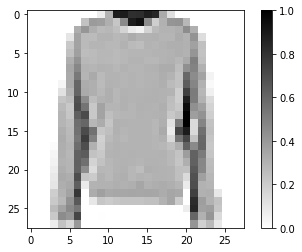

In [99]:
#mostrar una imagen de los datos de pruebas, de momento mostrar la primera
for imagen, etiqueta in datos_entrenamiento.take(1):
 break
imagen = imagen.numpy().reshape((28,28)) #redimensionar

import matplotlib.pyplot as plt

#Dibujar
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

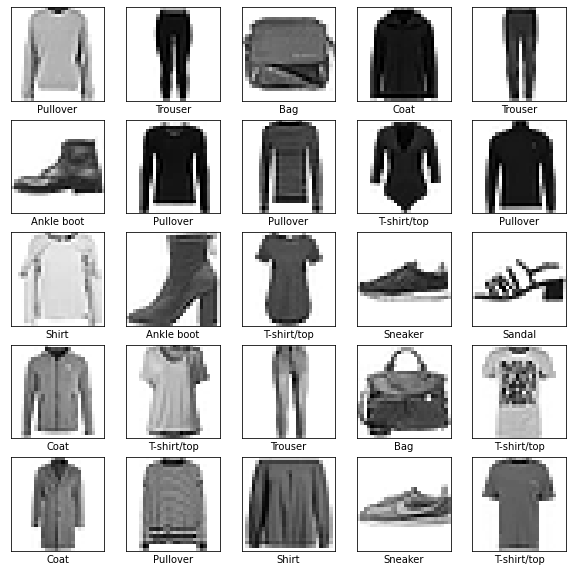

In [100]:
#Ahora si quiero ver 10 imagenes con etiqueta
plt.figure(figsize=(10,10))
for i, (imagen,etiqueta) in enumerate(datos_entrenamiento.take(25)):
   imagen= imagen.numpy().reshape((28,28))
   plt.subplot(5,5,i+1)
   plt.xticks([])
   plt.yticks([])
   plt.grid(False)
   plt.imshow(imagen,cmap=plt.cm.binary)
   plt.xlabel(nombres_clases[etiqueta])
plt.show()

In [101]:
#Crear el modelo

modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), #1 - blanco y negro, La capa flatten se encarga de convertir esta matriz y aplastarla a una sola dimension de 784 neuronas en donde se recibira cada pixel
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax) #Se usa la funcion softmax como funcion de activacion en la capa de salida en las redes que son tipo clasificacion, asegurando que la suma de las neuranas de salida nos de 1

])

In [102]:
#Ahora Compilar el modelo

modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), #Funcion de perdida , se usa en redes de clasificacion
    metrics=['accuracy']
)

In [103]:
num_ej_entrenamiento = metadatos.splits["train"].num_examples
num_ej_pruebas = metadatos.splits["test"].num_examples

In [104]:
print(num_ej_entrenamiento)
print(num_ej_pruebas)

60000
10000


In [105]:
#Para hacer que la red entrene mas rapido ya que son 70mil, se hara en lotes

TAMANO_LOTE = 32

#Ajustar datos de entrenamiento y pruebas , se daran vueltas al set de datos en el train quere que sea aleatoria y no en el mismo orden
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE) #Solo Opcion batch

In [106]:
import math

#Entrenar #precision tiene que ser al rededor del 88% 
historial = modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch= math.ceil(num_ej_entrenamiento/TAMANO_LOTE))

Epoch 1/5
1875/1875 [==============================] - 14s 3ms/step - loss: 0.5128 - accuracy: 0.8181
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3800 - accuracy: 0.8621
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3475 - accuracy: 0.8735
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3238 - accuracy: 0.8816
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3069 - accuracy: 0.8875


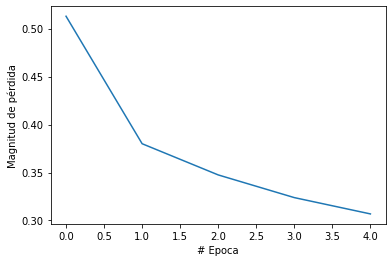

In [107]:
#Resultado de la funcion de perdida por epoca
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

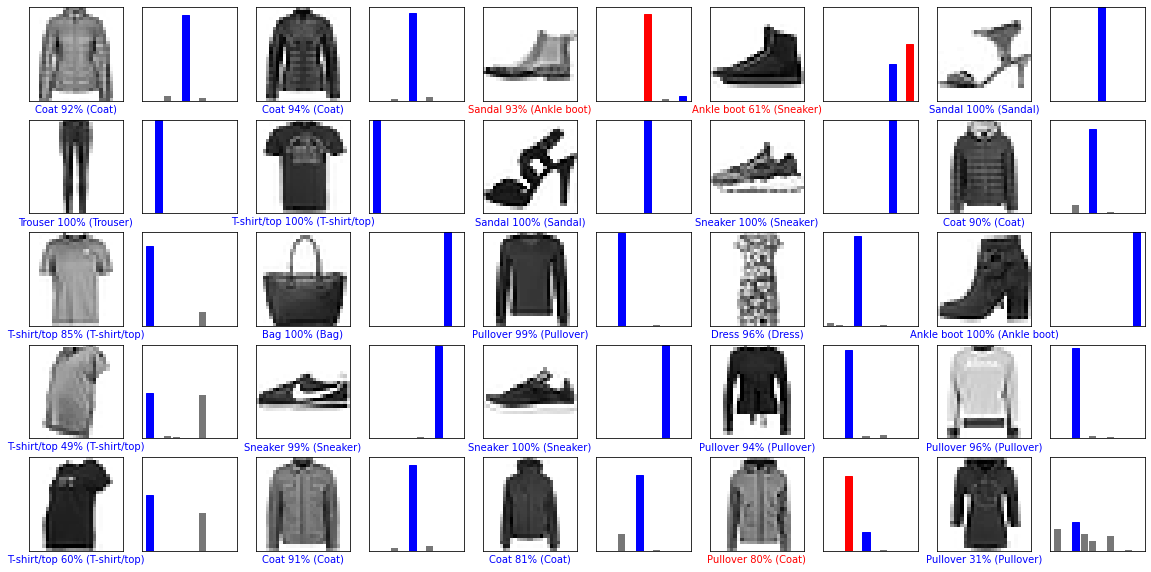

In [108]:
#Pintar una cuadricula con varias predicciones, y marcar si fue correcta (azul) o incorrecta (roja) ... 25 imagenes del set de pruebas y que intete predecir cada una , barra azul bien , bara roja mal
import numpy as np

for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)
  
def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                100*np.max(arr_predicciones),
                                nombres_clases[etiqueta_real]),
                                color=color)
  
def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(10), arr_predicciones, color="#777777")
  plt.ylim([0, 1]) 
  etiqueta_prediccion = np.argmax(arr_predicciones)
  
  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')
  
filas = 5
columnas = 5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2*columnas, 2*i+2)
  graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

In [109]:
#Tomar cualquier indice del set de datos para ver su predicción
print("Hagamos una Predicción")
imagen = imagenes_prueba[31]
imagen = np.array([imagen])
resultado = modelo.predict(imagen)

print("Prediccion: " + nombres_clases[np.argmax(resultado[0])])

Hagamos una Predicción


Prediccion: Sandal


In [110]:
#Exportar el modelo en formato h5
modelo.save('Clasificador_de_imagenes.h5')


In [111]:
#El equipo es Linux. Listemos el contenido de la carpeta actual para ver que se exporto el modelo
!ls

carpeta_salida	Clasificador_de_imagenes.h5  sample_data


In [112]:
#Para convertirlo a tensorflow.js, primero debemos instalar la libreria
!pip install tensorflowjs

In [113]:
#Crear carpeta donde se colocaran los archivos resultantes
!mkdir carpeta_salida

mkdir: cannot create directory ‘carpeta_salida’: File exists


In [114]:
#Realizar la exportacion a la carpeta de salida
!tensorflowjs_converter --input_format keras Clasificador_de_imagenes.h5 carpeta_salida

In [115]:
#Confirmar que en la carpeta de salida se hayan generado los archivos. Deben aparecer archivos "bin" y "json"
!ls carpeta_salida

group1-shard1of1.bin  model.json
